In [1]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import pylab   as plt

In [2]:
# hSBM specific libraries
from sbmtm import sbmtm
import graph_tool.all as gt

In [3]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [4]:
file = open('hSBM_full_simple_model.pickle', 'rb')
model = pickle.load(file)

In [5]:
# The hierarchical levels themselves are represented by individual BlockState() instances
levels = model.state.get_levels()
for s in levels:
    print(s)
    if s.get_N() == 1:
        break

<BlockState object with 38447 blocks (10 nonempty), degree-corrected, for graph <Graph object, undirected, with 38447 vertices and 119886 edges, 2 internal vertex properties, at 0x7f324c6a9ca0>, at 0x7f323c1b0c40>
<BlockState object with 8 blocks (4 nonempty), for graph <Graph object, undirected, with 38447 vertices and 16 edges, at 0x7f3225b325b0>, at 0x7f3225b32760>
<BlockState object with 2 blocks (2 nonempty), for graph <Graph object, undirected, with 8 vertices and 3 edges, at 0x7f322589f5e0>, at 0x7f3225b32e80>
<BlockState object with 1 blocks (1 nonempty), for graph <Graph object, undirected, with 2 vertices and 1 edge, at 0x7f32258aa3d0>, at 0x7f3225b32b50>


In [6]:
synth_file = open('synth_hSBM_full_simple_model.pickle', 'rb')
synth_model = pickle.load(synth_file)

In [7]:
synth_levels = synth_model.get_levels()
for s in synth_levels:
    print(s)
    if s.get_N() == 1:
        break

<BlockState object with 38447 blocks (8 nonempty), degree-corrected, for graph <Graph object, undirected, with 38447 vertices and 119755 edges, at 0x7f324c6af8b0>, at 0x7f32258add00>
<BlockState object with 9 blocks (5 nonempty), for graph <Graph object, undirected, with 38447 vertices and 10 edges, at 0x7f3225935280>, at 0x7f3225935880>
<BlockState object with 2 blocks (2 nonempty), for graph <Graph object, undirected, with 9 vertices and 5 edges, at 0x7f322593a250>, at 0x7f3225935fa0>
<BlockState object with 1 blocks (1 nonempty), for graph <Graph object, undirected, with 2 vertices and 1 edge, at 0x7f322593d040>, at 0x7f3225935640>


In [8]:
def index_array(which_model,clabel):
    array = [i for i in range(len(which_model.get_clabel(l=0).a)) if which_model.get_clabel(l=0).a[i] == clabel]
    return array

In [9]:
print(set(model.state.get_clabel(l=0).a))
documents_index = index_array(which_model=model.state, clabel=8) + index_array(which_model=model.state, clabel=4)
words_index = index_array(which_model=model.state, clabel=1) + index_array(which_model=model.state, clabel=7)

{8, 1, 4, 7}


In [14]:
df = pd.DataFrame(data=0, index=documents_index, columns=words_index)

for document in documents_index:
    neighbors = model.state.g.get_all_neighbors(document)
    if neighbors.size == 0:
        continue
    else:
        for col in df.columns:
            if col in neighbors:
                df[col][document] = 1
df

,38420,38423,38424,38429,38430,38434,38435,38436,38440,38441,...,38426,38427,38428,38431,38432,38433,38437,38438,38439,38446
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38397,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38399,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38406,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38410,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
df = df.sort_index()

In [16]:
df = df.rename(columns={38417: "hypertension",
38418: "diabetes_complicated",
38419: "renal_failure",
38420: "liver_disease",
38421: "cardiac_arrhythmias",
38422: "lymphoma",
38423: "fluid_electrolyte",
38424: "depression",
38425: "peripheral_vascular",
38426: "diabetes_uncomplicated",
38427: "obesity",
38428: "metastatic_cancer",
38429: "drug_abuse",
38430: "other_neurological",
38431: "congestive_heart_failure",
38432: "chronic_pulmonary",
38433: "valvular_disease",
38434: "coagulopathy",
38435: "deficiency_anemias",
38436: "alcohol_abuse",
38437: "hypothyroidism",
38438: "paralysis",
38439: "pulmonary_circulation",
38440: "solid_tumor",
38441: "weight_loss",
38442: "blood_loss_anemia",
38443: "peptic_ulcer",
38444: "psychoses",
38445: "aids",
38446: "rheumatoid_arthritis"})

In [17]:
patients_index = index_array(which_model=synth_model, clabel=0) + index_array(which_model=synth_model, clabel=2) + index_array(which_model=synth_model, clabel=6)
disease_index = index_array(which_model=synth_model, clabel=5) + index_array(which_model=synth_model, clabel=9)

In [18]:
print(set(synth_model.get_clabel(l=0).a))
print(set(synth_model.get_levels()[0].get_blocks().a))
len([i for i in range(len(synth_model.get_clabel(l=0).a)) if synth_model.get_clabel(l=0).a[i] == 0])

{0, 2, 5, 6, 9}
{24576, 30721, 25185, 31661, 20142, 10607, 24317, 17119}


71

In [19]:
synth_df = pd.DataFrame(data=0, index=patients_index, columns=disease_index)

for patient in patients_index:
    neighbors = synth_model.g.get_all_neighbors(patient)
    if neighbors.size == 0:
        continue
    else:
        for col in synth_df.columns:
            if col in neighbors:
                synth_df[col][patient] = 1

synth_df

,38417,38418,38419,38420,38421,38422,38423,38424,38425,38426,...,38439,38440,38441,38442,38443,38444,38445,38446,38429,38436
99,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
687,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
852,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1045,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38141,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
38196,0,0,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
38251,0,0,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
38342,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
synth_df = synth_df.sort_index()

In [21]:
synth_df = synth_df.rename(columns={38417: "hypertension",
38418: "diabetes_complicated",
38419: "renal_failure",
38420: "liver_disease",
38421: "cardiac_arrhythmias",
38422: "lymphoma",
38423: "fluid_electrolyte",
38424: "depression",
38425: "peripheral_vascular",
38426: "diabetes_uncomplicated",
38427: "obesity",
38428: "metastatic_cancer",
38429: "drug_abuse",
38430: "other_neurological",
38431: "congestive_heart_failure",
38432: "chronic_pulmonary",
38433: "valvular_disease",
38434: "coagulopathy",
38435: "deficiency_anemias",
38436: "alcohol_abuse",
38437: "hypothyroidism",
38438: "paralysis",
38439: "pulmonary_circulation",
38440: "solid_tumor",
38441: "weight_loss",
38442: "blood_loss_anemia",
38443: "peptic_ulcer",
38444: "psychoses",
38445: "aids",
38446: "rheumatoid_arthritis"})

In [22]:
print(set(model.state.get_levels()[0].get_blocks().a))
len([i for i in model.state.get_levels()[0].get_blocks().a if i == 14463])

{31007, 33837, 34799, 7152, 31889, 15471, 1168, 4661, 30423, 14463}


2920

In [23]:
clusters_num = [34799, 14463, 30423]
clusters = model.state.get_levels()[0].get_blocks().a[0:38417]

In [24]:
clusters = np.where(clusters.astype(str) == '34799', "A1", clusters)
clusters = np.where(clusters.astype(str) == '14463', "A2", clusters)
clusters = np.where(clusters.astype(str) == '30423', "B1", clusters)
clusters

array(['B1', 'B1', 'B1', ..., 'B1', 'B1', 'B1'], dtype='<U11')

In [25]:
def outer_cluster_add(clusters, df):
    df['cluster'] = clusters.tolist()
    outer_cluster = []
    for i in clusters:
        if i == "A1" or i == "A2":
            outer_cluster.append("A")
        else:
            outer_cluster.append("B")
    df['outer_cluster'] = outer_cluster
    return df

In [26]:
df = outer_cluster_add(clusters, df)
df

,liver_disease,fluid_electrolyte,depression,drug_abuse,other_neurological,coagulopathy,deficiency_anemias,alcohol_abuse,solid_tumor,weight_loss,...,metastatic_cancer,congestive_heart_failure,chronic_pulmonary,valvular_disease,hypothyroidism,paralysis,pulmonary_circulation,rheumatoid_arthritis,cluster,outer_cluster
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,B1,B
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,B1,B
2,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,B1,B
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,B1,B
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,B1,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38412,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,B1,B
38413,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,B1,B
38414,0,0,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,B1,B
38415,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,B1,B


In [40]:
synth_df = synth_df[df.columns]
synth_df

,liver_disease,fluid_electrolyte,depression,drug_abuse,other_neurological,coagulopathy,deficiency_anemias,alcohol_abuse,solid_tumor,weight_loss,...,metastatic_cancer,congestive_heart_failure,chronic_pulmonary,valvular_disease,hypothyroidism,paralysis,pulmonary_circulation,rheumatoid_arthritis,cluster,outer_cluster
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,B1,B
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,B1,B
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,B1,B
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,B1,B
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,B1,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38412,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,B1,B
38413,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,B1,B
38414,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,B1,B
38415,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,B1,B


In [41]:
df.to_csv("full_simple_elixhauser_comorbidity.csv",index=False)

In [42]:
print(set(synth_model.get_levels()[0].get_blocks().a))
synth_cluster_num = [10607,20142,24317]
synth_clusters = synth_model.get_levels()[0].get_blocks().a[0:38417]

{24576, 30721, 25185, 31661, 20142, 10607, 24317, 17119}


In [43]:
synth_clusters = np.where(synth_clusters.astype(str) == '10607', "A2", synth_clusters)
synth_clusters = np.where(synth_clusters.astype(str) == '20142', "A1", synth_clusters)
synth_clusters = np.where(synth_clusters.astype(str) == '24317', "B1", synth_clusters)
synth_clusters

array(['B1', 'B1', 'B1', ..., 'B1', 'B1', 'B1'], dtype='<U11')

In [44]:
synth_df = outer_cluster_add(synth_clusters, synth_df)
synth_df

,liver_disease,fluid_electrolyte,depression,drug_abuse,other_neurological,coagulopathy,deficiency_anemias,alcohol_abuse,solid_tumor,weight_loss,...,metastatic_cancer,congestive_heart_failure,chronic_pulmonary,valvular_disease,hypothyroidism,paralysis,pulmonary_circulation,rheumatoid_arthritis,cluster,outer_cluster
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,B1,B
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,B1,B
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,B1,B
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,B1,B
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,B1,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38412,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,B1,B
38413,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,B1,B
38414,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,B1,B
38415,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,B1,B


In [45]:
synth_df.to_csv('synth_full_simple_elixhauser_comorbidity.csv', index=False)

In [50]:
from sklearn.metrics.cluster import rand_score

df_inner_clusters = df['cluster'].to_list()
synth_df_inner_clusters = synth_df['cluster'].to_list()
clusters_similarity = rand_score(df_inner_clusters, synth_df_inner_clusters)
clusters_similarity

0.8483228275344098

In [185]:
def count_plot(df):
    df_count = df.copy()
    df_count['count'] = df_count.sum(axis=1)
    cluster_set = list(dict.fromkeys(df_count['cluster']))
    cluster_df = pd.DataFrame({cluster_set[0]: df_count[df_count['cluster'] == cluster_set[0]]['count'].value_counts()})
    for cluster in cluster_set[1:]:
        cluster_counts = df_count[df_count['cluster'] == cluster]
        cluster_df = cluster_df.join(pd.DataFrame({cluster :cluster_counts['count'].value_counts()}), how='outer')
    cluster_df = cluster_df.fillna(0)
    cluster_df.astype({"B1":'int', "A1":'int', "A2":'int'})
    cluster_df = cluster_df[["A1", "A2", "B1"]]

    fig, ax = plt.subplots(figsize=(8, 8))
    for i, col in enumerate(cluster_df.columns):
        ax.scatter([i] * len(cluster_df), cluster_df.index.to_list(), s=cluster_df[col]*0.1, label=col)

    ax.set_xlabel('Cluster')
    ax.set_xticks(range(len(cluster_df.columns)))
    ax.set_xticklabels(cluster_df.columns)
    ax.set_ylabel('Count')
    ax.set_yticks(cluster_df.index)
    ax.set_yticklabels(cluster_df.index)
    plt.show()

/tmp/ipykernel_83605/778362395.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_count['count'] = df_count.sum(axis=1)


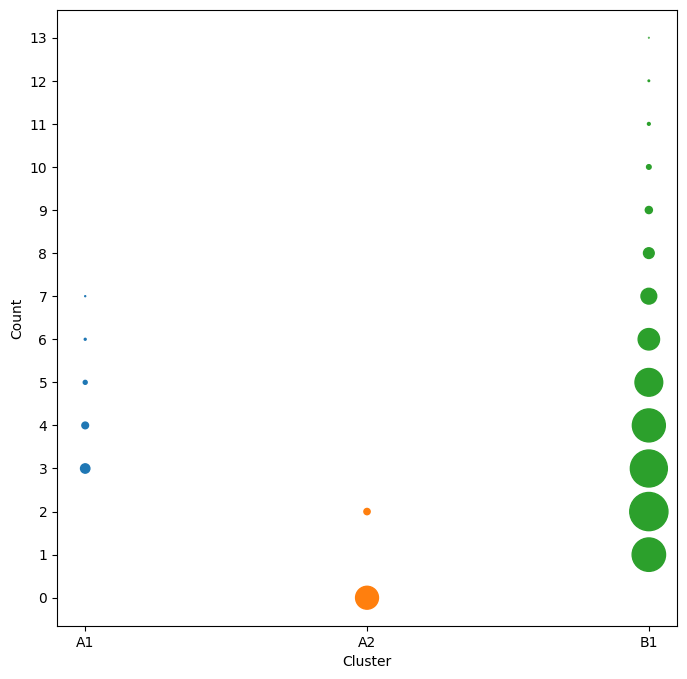

In [186]:
count_plot(df)

/tmp/ipykernel_83605/778362395.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_count['count'] = df_count.sum(axis=1)


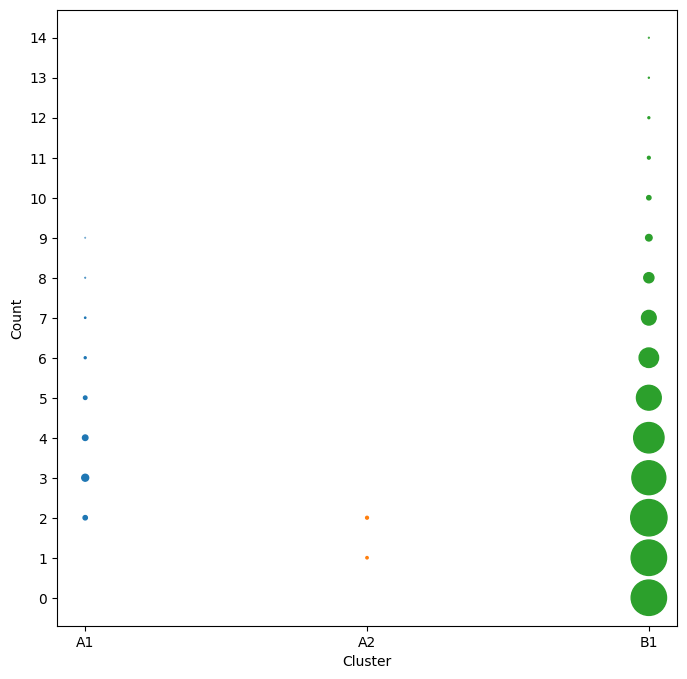

In [187]:
count_plot(synth_df)

In [198]:
from scipy.stats import chi2_contingency

contingency_table = np.array([df.iloc[:, 0:30].sum().values, synth_df.iloc[:, 0:30].sum().values])
chi2_stat, p_val, dof, ex = chi2_contingency(contingency_table)
print(f"Chi-Squared Statistic: {chi2_stat}\nDegrees of Freedom: {dof}\np-value: {p_val}")

Chi-Squared Statistic: 577.2708500928194
Degrees of Freedom: 29
p-value: 3.3052657866267067e-103


In [208]:
list1 = df['liver_disease'].to_list()
list2 = synth_df['liver_disease'].to_list()

mean1 = np.mean(list1)
mean2 = np.mean(list2)
std1 = np.std(list1)
std2 = np.std(list2)

contingency_table = np.array([[list1.count(1), list1.count(0)],
                              [list2.count(1), list2.count(0)]])

chi2_stat, p_val, dof, ex = chi2_contingency(contingency_table)
print(f"Chi-Squared Statistic: {chi2_stat}\nDegrees of Freedom: {dof}\np-value: {p_val}")

Chi-Squared Statistic: 0.0
Degrees of Freedom: 1
p-value: 1.0
